In [1]:
import sys
sys.path.append('../')

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from utils.constraint import *

DATA_PATH = "/dust3r/masked_dust3r/data/jackal_training_data_0"

with open(os.path.join(DATA_PATH, "transforms.json"), "r") as f:
    transforms = json.load(f)

[[-1.40699134e+02 -2.79711382e+00 -1.57143839e+01]
 [-1.39864223e+02 -2.22392205e+00  4.22502322e+00]
 [-1.39017519e+02 -2.19632137e+00  2.48795373e+01]
 [-1.45415749e+02 -3.51092426e-02  4.71701313e+01]
 [-1.46847370e+02  1.46659453e+00  6.59915524e+01]
 [-1.42208532e+02  1.91786362e-01  8.58888785e+01]
 [-1.40423311e+02  3.82100580e-01  1.05712113e+02]
 [-1.37572592e+02  1.26941723e+00  1.27773717e+02]
 [-1.35293386e+02  1.15450796e+00  1.48345830e+02]
 [-1.35105339e+02 -1.23022349e+00  1.67816446e+02]
 [-1.35617792e+02 -5.87395967e-01 -1.71492089e+02]
 [-1.39217379e+02 -1.35130878e+00 -1.49282590e+02]
 [-1.41377044e+02 -2.50216923e-01 -1.28180051e+02]
 [-1.47039113e+02 -7.52367564e-01  7.95815205e+01]
 [-1.41282786e+02  3.89818068e+00  1.00832682e+02]]


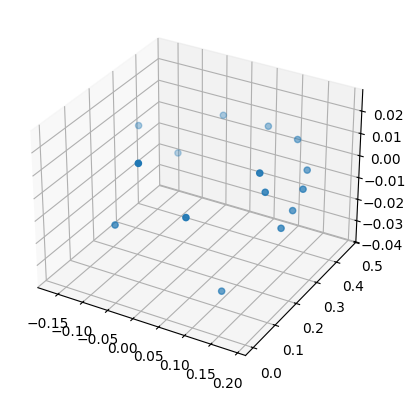

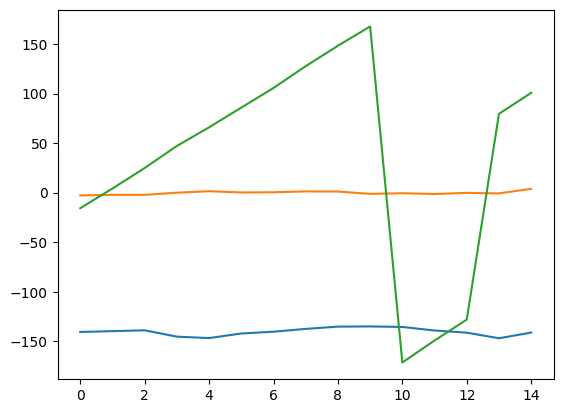

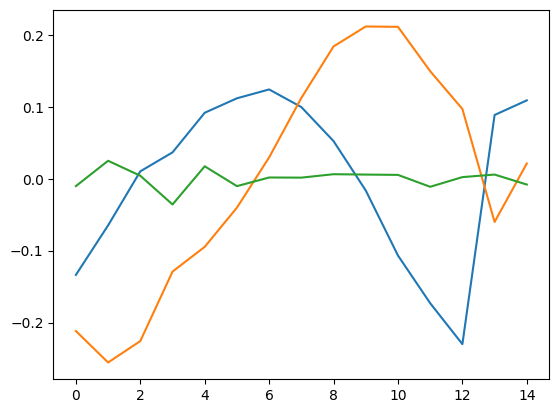

In [4]:
transforms["frames"] = rotate_best_fit_plane(transforms["frames"])

points = []
euler_angle = []
for frame in transforms["frames"]:
    tf = frame["transform_matrix"]
    tf = np.array(tf).reshape(4, 4)
    points.append(tf[0:3, 3])
    r = R.from_matrix(tf[0:3, 0:3])
    euler_angle.append(r.as_euler('xyz', degrees=True))

points = np.array(points)
euler_angle = np.array(euler_angle)
print(euler_angle)

# Plot the points

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# Plot the euler angles with respect to index
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(euler_angle[:, 0], label="x")
ax.plot(euler_angle[:, 1], label="y")
ax.plot(euler_angle[:, 2], label="z")

# Plot the points with respect to index
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(points[:, 0] - points[:,0].sum()/len(points[:,0]), label="x")
ax.plot(points[:, 1] - points[:,1].sum()/len(points[:,1]), label="y")
ax.plot(points[:, 2] - points[:,2].sum()/len(points[:,2]), label="z")

plt.show()